# 3. More Distributions and the Central Limit Theorem

It’s time to explore one of the most important probability distributions in statistics, normal distribution. You’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to your repertoire.


## The normal distribution


### Distribution of Amir's sales

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the `amount` variable follows.


Create a histogram with 10 bins to visualize the distribution of the `amount`. Show the plot.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
amir_deals = pd.read_csv("datasets/amir_deals.csv")
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


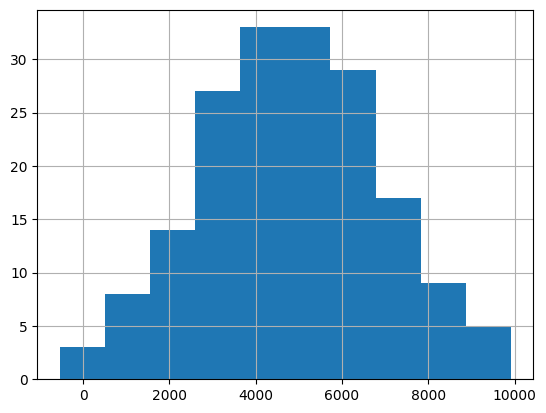

In [3]:
amir_deals["amount"].hist(bins=10)
plt.show()

Question:

Which probability distribution do the sales amounts most closely follow?

- Uniform
- Binomial
- Normal (✓)
- None of the above


### Probabilities from the normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.


What's the probability of Amir closing a deal worth less than $7500?


In [5]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

0.8943502263331446


What's the probability of Amir closing a deal worth more than $1000?


In [6]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

0.9772498680518208


What's the probability of Amir closing a deal worth between $3000 and $7000?


In [7]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

0.6826894921370859


What amount will 25% of Amir's sales be less than?


In [8]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


### Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the `new_sales` DataFrame, which has already been created for you.


- Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in `new_mean`.
- Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in `new_sd`.
- Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of `new_sd`.
- Plot the distribution of the `new_sales` `amounts` using a histogram and show the plot.


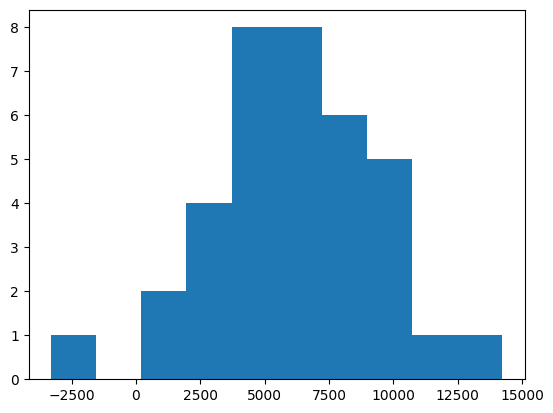

In [9]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

**Which market is better?**

The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of $5000 and a standard deviation of $2000, and Amir's predicted amounts in next quarter's market have a mean of $6000 and a standard deviation of $2600.

Based only on the metric of percent of sales over $1000, does Amir perform better in the current market or the predicted market?

- Amir performs much better in the current market.
- Amir performs much better in next quarter's predicted market
- Amir performs about equally in both markets.


In [12]:
print(1 - norm.cdf(1000, 5000, 2000))
print(1 - norm.cdf(1000, 6000, 2600))

0.9772498680518208
0.9727648049862613


In the current market, Amir makes sales over $1000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well.


## The central limit theorem


###`The CLT in action
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the `num_users` column of `amir_deals` more closely, which contains the number of people who intend to use the product Amir is selling.


Create a histogram of the `num_users` column of `amir_deals` and show the plot.


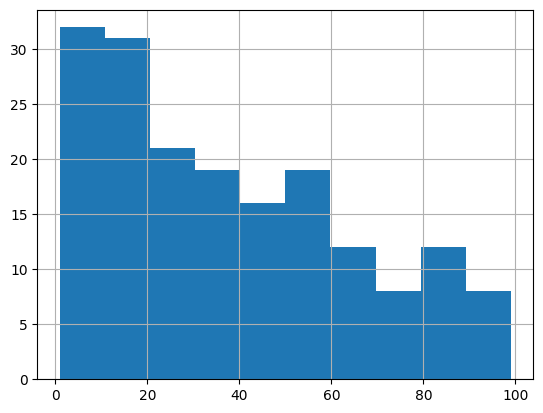

In [13]:
# Create a histogram of num_users and show
amir_deals["num_users"].hist()
plt.show()

- Set the seed to `104`.
- Take a sample of size `20` with replacement from the `num_users` column of `amir_deals`, and take the mean.


In [16]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals["num_users"].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

32.0


Repeat this 100 times using a `for` loop and store as `sample_means`. This will take 100 different samples and calculate the mean of each.


In [17]:
sample_means = []
# Loop 100 times
for i in range(100):
    # Take sample of 20 num_users
    samp_20 = amir_deals["num_users"].sample(20, replace=True)
    # Calculate mean of samp_20
    samp_20_mean = np.mean(samp_20)
    # Append samp_20_mean to sample_means
    sample_means.append(samp_20_mean)

print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


Convert `sample_means` into a `pd.Series`, create a histogram of the `sample_means`, and show the plot.


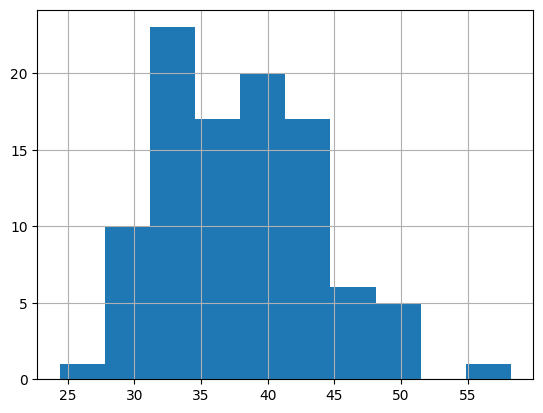

In [18]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

### The mean of means

You want to know what the average number of users (`num_users`) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.


In [28]:
all_deals = pd.read_csv("datasets/all_deals.csv", index_col=0)
all_deals.head()

,Unnamed: 0,product,num_users
0,1,3544,19
1,2,5073,43
2,3,6149,87
3,4,7863,83
4,5,14,17


- Set the random seed to `321`.
- Take 30 samples (with replacement) of size 20 from `all_deals['num_users']` and take the mean of each sample. Store the sample means in `sample_means`.
- Print the mean of `sample_means`.
- Print the mean of the `num_users` column of `amir_deals`.


In [29]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
    # Take sample of size 20 from num_users col of all_deals with replacement
    cur_sample = all_deals["num_users"].sample(20, replace=True)
    # Take mean of cur_sample
    cur_mean = cur_sample.mean()
    # Append cur_mean to sample_means
    sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(amir_deals["num_users"].mean())

38.31333333333332
37.651685393258425


## The Poisson distribution


### Tracking lead responses

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.


Import `poisson` from `scipy.stats` and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.


In [1]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

0.1562934518505317


Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?


In [2]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

0.17140068409793663


What's the probability that Amir responds to 2 or fewer leads in a day?


In [3]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

0.23810330555354436


What's the probability that Amir responds to more than 10 leads in a day?


In [4]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.0028397661205137315


## More on probability distributions


### Modeling time between leads
To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, he responds to 1 request every 2.5 hours. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

Import `expon` from `scipy.stats`. What's the probability it takes Amir less than an hour to respond to a lead?

In [5]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607



What's the probability it takes Amir more than 4 hours to respond to a lead?

In [6]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale = 2.5))

0.20189651799465536


What's the probability it takes Amir 3-4 hours to respond to a lead?

In [7]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale = 2.5) - expon.cdf(3, scale = 2.5))

0.09929769391754684
